In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/skope-rules
!pip install fuzzywuzzy
!pip install python-Levenshtein

  Cloning https://github.com/scikit-learn-contrib/skope-rules to /tmp/pip-req-build-vrqenudh
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/skope-rules /tmp/pip-req-build-vrqenudh
  Resolved https://github.com/scikit-learn-contrib/skope-rules to commit 35553e98558c728e063c4d4dab3941ce8f6e3609
  Preparing metadata (setup.py) ... done
  Created wheel for skope-rules: filename=skope_rules-1.0.1-py3-none-any.whl size=14926 sha256=e533be73e2adb7097aac73e3c37262dcaa2cea571ca92dd3efdaee3768f04a3b
  Stored in directory: /tmp/pip-ephem-wheel-cache-eot4qyv4/wheels/21/5b/9c/59590b2cf7e0a830956653e025b3e04eefce6953a54bbaae72
Successfully built skope-rules
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import files
import io
import ast
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz
import itertools as iter
import re

In [ ]:
# google drive mounting to colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# football player stats feature engineering (coming soon ✈)

In [ ]:
# dataset of combined football_player_stats end season 2022 and 2023

football_player_stats_2023 = pd.read_csv(r'/content/gdrive/MyDrive/KMST/2022-2023 Football Player Stats.csv', sep=';', encoding='latin-1')
football_player_stats_2022 = pd.read_csv(r'/content/gdrive/MyDrive/KMST/2021-2022 Football Player Stats.csv', sep=';', encoding='latin-1')


In [ ]:
# dataset of separated football player stats end season 2018

stats_2018_bundesliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2017Bundesliga.csv', sep=',', encoding='latin-1')
stats_2018_laliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2017LaLiga.csv', sep=',', encoding='latin-1')
stats_2018_ligue1= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2017Ligue1.csv', sep=',', encoding='latin-1')
stats_2018_premiereleague= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2017PremierLeague.csv', sep=',', encoding='latin-1')
stats_2018_seriea= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2017SerieA.csv', sep=',', encoding='latin-1')

# dataset of separated football player stats end season 2019
stats_2019_bundesliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2018Bundesliga.csv', sep=',', encoding='latin-1')
stats_2019_laliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2018LaLiga.csv', sep=',', encoding='latin-1')
stats_2019_ligue1= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2018Ligue1.csv', sep=',', encoding='latin-1')
stats_2019_premiereleague= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2018PremierLeague.csv', sep=',', encoding='latin-1')
stats_2019_seriea= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2018SerieA.csv', sep=',', encoding='latin-1')

# dataset of separated football player stats end season 2020
stats_2020_bundesliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2019Bundesliga.csv', sep=',', encoding='latin-1')
stats_2020_laliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2019LaLiga.csv', sep=',', encoding='latin-1')
stats_2020_ligue1= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2019Ligue1.csv', sep=',', encoding='latin-1')
stats_2020_premiereleague= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2019PremierLeague.csv', sep=',', encoding='latin-1')
stats_2020_seriea= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2019SerieA.csv', sep=',', encoding='latin-1')

# dataset of separated football player stats end season 2021
stats_2021_bundesliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2020Bundesliga.csv', sep=',', encoding='latin-1')
stats_2021_laliga= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2020LaLiga.csv', sep=',', encoding='latin-1')
stats_2021_ligue1= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2020Ligue1.csv', sep=',', encoding='latin-1')
stats_2021_premiereleague= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2020PremierLeague.csv', sep=',', encoding='latin-1')
stats_2021_seriea= pd.read_csv(r'/content/gdrive/MyDrive/KMST/football_player_stats_2017_2020/2020SerieA.csv', sep=',', encoding='latin-1')


In [ ]:
# combined the dataset for football players and some cleaning
def cleaning(lst, year= 0):
  df = pd.concat(lst)
  # clean all nan values
  df = df.dropna()
  df['season_end'] = year
  # remove first column
  df = df.iloc[:, 1:]
  return df

stats_2018 = cleaning([stats_2018_bundesliga, stats_2018_laliga, stats_2018_ligue1, stats_2018_premiereleague, stats_2018_seriea], year=2018)
stats_2019 =cleaning([stats_2019_bundesliga, stats_2019_laliga, stats_2019_ligue1, stats_2019_premiereleague, stats_2019_seriea], year=2019)
stats_2020 = cleaning([stats_2020_bundesliga, stats_2020_laliga, stats_2020_ligue1, stats_2020_premiereleague, stats_2020_seriea], year=2020)
stats_2021 = cleaning([stats_2021_bundesliga, stats_2021_laliga, stats_2021_ligue1, stats_2021_premiereleague, stats_2021_seriea], year=2021)

In [ ]:
def group_by_team(df):
  x = df.groupby(by='team', axis = 0)
  return x

stats_2018 = group_by_team(stats_2018)
stats_2018

# Matches dataset feature engineering

In [ ]:
# match dataset
# all files are csv file, you can just modify everything based on your needs
bundesliga = pd.read_csv(r'/content/gdrive/MyDrive/KMST/5_leagues_match_results/bundesliga-match-scores.csv', sep=',', encoding='latin-1')
league_one = pd.read_csv(r'/content/gdrive/MyDrive/KMST/5_leagues_match_results/frenchligue1-match-scores.csv', sep=',', encoding='latin-1')
laliga = pd.read_csv(r'/content/gdrive/MyDrive/KMST/5_leagues_match_results/laliga-match-scores.csv', sep=',', encoding='latin-1')
premierleague = pd.read_csv(r'/content/gdrive/MyDrive/KMST/5_leagues_match_results/premierleague-match-scores.csv', sep=',', encoding='latin-1')
serie_a = pd.read_csv(r'/content/gdrive/MyDrive/KMST/5_leagues_match_results/seriea-match-scores.csv', sep=',', encoding='latin-1')

# remove unused data. Only use score, expected goals of away and home team
print(serie_a)
serie_a = serie_a.iloc[:, 2:9]
bundesliga = bundesliga.iloc[:, 3:10]
laliga = laliga.iloc[:, 2:9]
premierleague = premierleague.iloc[:, 2:9]
league_one = league_one.iloc[:, 3:10]

# concat all matches of 5 european leagues
combined_match = pd.concat([serie_a, bundesliga, laliga, premierleague, league_one])
combined_match = combined_match.sort_values(by=['home', 'date'])
combined_match = combined_match.iloc[1:, :]

# reset index and drop columns
combined_match = combined_match.reset_index().drop(['index', 'time'], axis=1)

# change the data to lowercase
combined_match['home'] = [x.lower() for x in combined_match['home']]
combined_match['away'] = [x.lower() for x in combined_match['away']]


      Unnamed: 0  day        date   time           home  xg_home  score  \
0              0  Sat  2021-08-21  18:30  Hellas Verona      2.1  2â3   
1              1  Sat  2021-08-21  18:30          Inter      1.5  4â0   
2              2  Sat  2021-08-21  20:45         Empoli      1.3  1â3   
3              3  Sat  2021-08-21  20:45         Torino      1.3  1â2   
4              4  Sun  2021-08-22  18:30        Bologna      1.5  3â2   
...          ...  ...         ...    ...            ...      ...    ...   
1895        2101  Sun  2018-05-20  18:00       Cagliari      0.4  1â0   
1896        2102  Sun  2018-05-20  18:00          Milan      2.4  5â1   
1897        2103  Sun  2018-05-20  18:00        Udinese      1.4  1â0   
1898        2104  Sun  2018-05-20  20:45       Sassuolo      0.9  0â1   
1899        2105  Sun  2018-05-20  20:45          Lazio      1.3  2â3   

      xg_away         away  attendance                          venue  \
0         1.4     Sassuolo

In [ ]:
# feature engineering for score list

combined_match = combined_match.dropna() # drop nan value
scores = {'home_scores': list(), 'away_scores': list()}
count = 0
for x in combined_match['score']:
  score = x.split('â')
  try:
    scores['home_scores'].append(float(score[0]))
    scores['away_scores'].append(float(score[1]))
  except ValueError:
    scores['home_scores'].append(float(4))
    scores['away_scores'].append(float(1))

combined_match['home_score'] = scores['home_scores']
combined_match['away_score'] = scores['away_scores']

# drop the original score
df = combined_match.drop('score', axis =1)

# standardize the date time
df['date'] = pd.to_datetime(df['date'])

# add the football season based on the date of the matches
season_end = list()
for x in df['date']:
  if x <= pd.to_datetime('2018-08-01'):
    season_end.append(2018)
  elif pd.to_datetime('2018-08-01') <= x <= pd.to_datetime('2019-08-01'):
    season_end.append(2019)
  elif pd.to_datetime('2019-08-01') <= x <= pd.to_datetime('2020-08-01'):
    season_end.append(2020)
  elif pd.to_datetime('2020-08-01') <= x <= pd.to_datetime('2021-08-01'):
    season_end.append(2021)
  elif x >= pd.to_datetime('2021-08-01'):
    season_end.append(2022)
  else:
    season_end.append(np.nan)

df['season_end'] = season_end

<ipython-input-9-b1e61bff0033>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_match['home_score'] = scores['home_scores']
<ipython-input-9-b1e61bff0033>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_match['away_score'] = scores['away_scores']


In [ ]:
# change column order
col = ['date', 'home', 'away', 'season_end', 'home_score', 'away_score', 'xg_home', 'xg_away']
df = df.loc[:, col]
df

,date,home,away,season_end,home_score,away_score,xg_home,xg_away
0,2017-08-26,alavã©s,barcelona,2018,0.0,2.0,0.8,2.4
1,2017-09-17,alavã©s,villarreal,2018,0.0,3.0,0.4,1.9
2,2017-09-23,alavã©s,real madrid,2018,1.0,2.0,0.7,3.1
3,2017-10-14,alavã©s,real sociedad,2018,0.0,2.0,0.5,0.7
4,2017-10-28,alavã©s,valencia,2018,1.0,2.0,0.8,1.1
...,...,...,...,...,...,...,...,...
9142,2022-03-18,wolves,leeds united,2022,2.0,3.0,0.8,2.2
9143,2022-04-02,wolves,aston villa,2022,2.0,1.0,1.2,2.1
9144,2022-04-30,wolves,brighton,2022,0.0,3.0,0.6,2.5
9145,2022-05-11,wolves,manchester city,2022,1.0,5.0,0.5,3.1


In [ ]:
# dataset of 2022/ 2023 football matches (since the dataset doesn't include that)

path = r'/content/gdrive/MyDrive/KMST/2022-2023 match results.xlsx'
match_2023 = pd.read_excel(path)

# add season
match_2023['season_end'] = 2023

# sort based on columns
match_2023 = match_2023.loc[:, col]

# standardize the date and time
match_2023['date'] = pd.to_datetime(match_2023['date'])

# change the data to lowercase

match_2023['home'] = [x.lower() for x in match_2023['home']]
match_2023['away'] = [x.lower() for x in match_2023['away']]

# all teams
team_names_2023 = list(set(list(match_2023['home']) + list(match_2023['away'])))
team_names_2018_2022 = list(set(list(df['home']) + list(df['away'])))

In [ ]:
# match team names using fuzzywuzzy algorithms
# since we use two different dataset, the name of the teams are also distinctive and entity matching needs to be done in order to avoid any potential duplicates or data lost

similar_word = list()
distinct_word = list()

for x in team_names_2018_2022:
  for y in team_names_2023:
    similarity = fuzz.ratio(x,y)
    if similarity >= 68:
      similar_word.append([x,y])

exception = ['west brom', 'west ham']
similar_word = [x for x in similar_word if x != exception]

# filter the dataset of team names 2018 to 2022
exceptions_2018_2022= list()
exceptions_2023 = list()
for x in team_names_2018_2022:
  if x not in list(iter.chain.from_iterable(similar_word)):
    exceptions_2018_2022.append(x)
for x in team_names_2023:
  if x not in list(iter.chain.from_iterable(similar_word)):
    exceptions_2023.append(x)


In [ ]:
# combine automatic matching with manual annotations

annotation = [['paris s-g', 'paris saint-germain'], ['lille', 'losc lille'], ['freiburg', 'sport-club freiburg'], ['troyes', 'estac troyes'], ['nice', 'ogc nice'], ['reims','stade de reims'], ['brest', 'stade brestois 29'], ['marseille', 'olympique de marseille'], ['betis','real betis'], ["m'gladbach",'borussia mönchengladbach'],
  ['strasbourg','rc strasbourg alsace'], ['bochum', 'vfl bochum 1848'], ['lyon','olympique lyonnais'],
   ['cã¡diz','cádiz cf'], ['man utd', 'manchester utd'], ['dortmund','borussia dortmund'], ['rennes', 'stade rennais fc'],
    ['tottenham','spurs', 'tottenham hotspurs'], ['kã¶ln', '1. fc köln', 'fc köln'], ['celta vigo', 'rc celta', 'rc celta vigo']]

similar_team_name = similar_word
for x in annotation:
  similar_team_name.append(x)

In [ ]:
# change all list of strings in a given list

def process_strings(list_of_strings, list_of_lists):
    combined_list = []

    for string in list_of_strings:
        found_match = False
        for sublist in reversed(list_of_lists):
            if string in sublist:
                combined_list.append(sublist[-1])
                found_match = True
                break
        if not found_match:
            combined_list.append(string)

    return combined_list

In [ ]:
# all european league competition data from 2017-2018 to 2022-2023
match_data = df.append(match_2023).reset_index().drop('index', axis = 1)

# change all the teams based on the word similarities
new_home = process_strings(list(match_data['home']), similar_team_name)
new_away = process_strings(list(match_data['away']), similar_team_name)

match_data['home'] = new_home
match_data['away'] = new_away

# regex to remove numbers and dot
def remove_num(text):
    return re.sub(r'\d+\.\d+|\d+|\.', '', text)

match_data['home'] = match_data['home'].apply(remove_num)
match_data['away'] = match_data['away'].apply(remove_num)

# sort by home and date
match_data = match_data.sort_values(by=['home', 'date']).reset_index()
match_data = match_data.iloc[:, 1:]


<ipython-input-15-9de7007523cc>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  match_data = df.append(match_2023).reset_index().drop('index', axis = 1)


In [ ]:
# add some additional features

match_data['total_goal'] = [match_data["home_score"][x] + match_data["away_score"][x]  for x in range(len(match_data))]
match_data['score_differences'] = [match_data["home_score"][x] - match_data["away_score"][x]  for x in range(len(match_data))]
match_data['xg_differences'] = [match_data["xg_home"][x] - match_data["xg_away"][x]  for x in range(len(match_data))]
match_data['CumulativeHomeGoals'] = match_data.groupby(['season_end', 'home'])['home_score'].cumsum()
match_data['CumulativeAwayGoals'] = match_data.groupby(['season_end', 'home'])['away_score'].cumsum()
match_data['AvgCumulativeHomeGoals'] = match_data['CumulativeHomeGoals'] / match_data.groupby(['season_end', 'home']).cumcount()
match_data['AvgCumulativeAwayGoals'] = match_data['CumulativeAwayGoals'] / match_data.groupby(['season_end', 'home']).cumcount()

match_data.replace(np.inf, np.nan, inplace=True)
match_data = match_data.fillna(0)

# # match data with 3 targets (uncomment if you need to change the target / y)

match_data['avgcumdiff'] = match_data['AvgCumulativeHomeGoals'] - match_data['AvgCumulativeAwayGoals']
target = []
for idx in range(len(match_data)):
  if match_data['home_score'][idx] > match_data['away_score'][idx]:
    target.append('win')
  elif match_data['home_score'][idx] == match_data['away_score'][idx]:
    target.append('draw')
  else:
    target.append('lose')
match_data['target'] = target

# # match data with 2 targets (uncomment if you need to change the target / y)
# match_data['target'] = np.where(match_data['home_score'] > match_data['away_score'], 'win', 'lose')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalization of the numerical data

minmax = MinMaxScaler()
zscore = StandardScaler()
match_data['CumulativeHomeGoals'] = minmax.fit_transform(match_data[['CumulativeHomeGoals']])
match_data['CumulativeAwayGoals'] = minmax.fit_transform(match_data[['CumulativeAwayGoals']])
match_data['total_goal'] = minmax.fit_transform(match_data[['total_goal']])
match_data['home_score'] = minmax.fit_transform(match_data[['home_score']])
match_data['away_score'] = minmax.fit_transform(match_data[['away_score']])
match_data['xg_differences'] = zscore.fit_transform(match_data[['xg_differences']])

# Decision Tree Algorithm

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pydotplus
import graphviz
import shap
import numpy as np
import os
from collections import OrderedDict

In [ ]:
# drop score-related features to avoid "cheating"
dataset = match_data.iloc[:, 6:]
dataset = dataset.drop(['score_differences'], axis=1)

# shuffle samples
dataset = dataset.sample(frac = 1)
testing_set = dataset.sample(frac = 0.1)

# training data
datum = dataset[~dataset.isin(testing_set).all(axis=1)]
target, class_name = pd.factorize(datum['target'])
datum = datum.iloc[:, :-1]
print(dataset)

      xg_home  xg_away  total_goal  xg_differences  CumulativeHomeGoals  \
5127      1.1      0.9         0.1       -0.037694             0.217949   
8062      1.7      1.7         0.3       -0.209493             0.128205   
1203      1.6      1.4         0.3       -0.037694             0.307692   
9511      0.7      0.3         0.2        0.134105             0.115385   
6792      1.0      1.0         0.1       -0.209493             0.166667   
...       ...      ...         ...             ...                  ...   
6966      2.5      1.7         0.3        0.477702             0.141026   
7414      2.6      1.8         0.4        0.477702             0.230769   
2902      1.8      1.5         0.3        0.048205             0.346154   
3055      1.0      1.0         0.2       -0.209493             0.012821   
7034      1.7      2.6         0.6       -0.982588             0.256410   

      CumulativeAwayGoals  AvgCumulativeHomeGoals  AvgCumulativeAwayGoals  \
5127             0.304

[0.6544757033248082, 0.6360613810741688, 0.6395140664961637, 0.6479539641943735, 0.6269820971867007]
[0.6424552429667519, 0.648081841432225, 0.6342710997442456, 0.640920716112532, 0.6138107416879796]
training accuracy = 0.6409974424552429
test accuracy = 0.6359079283887468
              precision    recall  f1-score   support

         win       0.62      0.85      0.71      4268
        lose       0.60      0.63      0.61      3057
        draw       1.00      0.27      0.42      2450

    accuracy                           0.64      9775
   macro avg       0.74      0.58      0.58      9775
weighted avg       0.71      0.64      0.61      9775



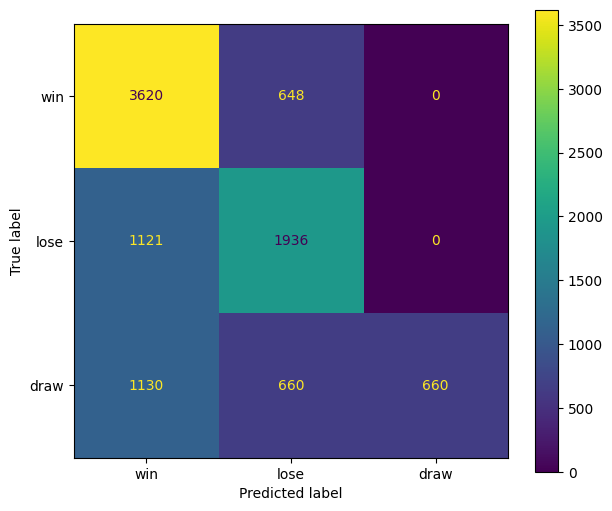

In [ ]:
#Decision Tree Classifier

X = datum
y = target
graphs = []
model = DecisionTreeClassifier(max_depth=4)

accuracy_trainings = []
accuracy_tests = []

predicted_targets = np.array([])
actual_targets = np.array([])

#Training data with Stratified 5-fold Cross Validation

for train_index, test_index in StratifiedKFold().split(X,y):

  # separating training and test set
  X_train, X_test =  X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y[train_index], y[test_index]

  #training and predict model
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  report = classification_report(y_test, model.predict(X_test), target_names = class_name)

  accuracy_trainings.append(accuracy_score(y_train, model.predict(X_train)))
  accuracy_tests.append(accuracy_score(y_test, predictions))

  #Visualize Decision Tree Model of each 5-fold
  dot_data = tree.export_graphviz(model, feature_names= datum.columns,
                     class_names = class_name, filled=True,
                     impurity=True)
  graph = graphviz.Source(dot_data)
  graphs.append(graph)
  '''
  cm_1 = confusion_matrix(y_test, predictions)
  rp = classification_report(y_test, predictions, target_names = class_name)
  '''
  predicted_targets = np.append(predicted_targets, predictions)
  actual_targets = np.append(actual_targets, y_test)
  '''
  print(rp)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels= class_name)
  fig, ax = plt.subplots(figsize=(7,6))
  disp.plot(ax=ax)
  '''


# Plot decision tree with the best accuracy
dicts = {accuracy_tests[i]: graphs[i] for i in range(len(accuracy_tests))}
sorted_dicts = OrderedDict(sorted(dicts.items()))

list(sorted_dicts.values())[-1].render('graph.png', view=True)


#Confusion Matrix and Classification Report (Precise, Recall, f1-score)
cm = confusion_matrix(actual_targets, predicted_targets)
report = classification_report(actual_targets, predicted_targets, target_names =class_name)

# Visualizing all result
print(accuracy_trainings)
print(accuracy_tests)
print('training accuracy = {}'.format(np.average(accuracy_trainings)))
print('test accuracy = {}'.format(np.average(accuracy_tests)))

print(report)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= class_name)
fig, ax = plt.subplots(figsize=(7,6))
disp.plot(ax=ax)




# Random Forest Algorithm

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

[0.6603580562659846, 0.6537084398976982, 0.659462915601023, 0.6611253196930946, 0.6601023017902813]
[0.640920716112532, 0.6664961636828645, 0.6521739130434783, 0.6460358056265985, 0.6562659846547314]
training accuracy = 0.6589514066496164
test accuracy = 0.6523785166240409
              precision    recall  f1-score   support

         win       0.64      0.84      0.73      4268
        lose       0.60      0.69      0.65      3057
        draw       1.00      0.27      0.42      2450

    accuracy                           0.65      9775
   macro avg       0.75      0.60      0.60      9775
weighted avg       0.72      0.65      0.63      9775



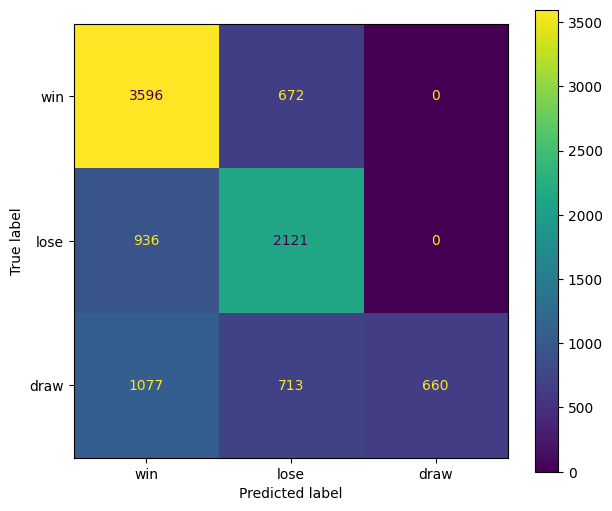

In [ ]:
# 5-fold cross validation for random forest

X = datum
y = target

model = RandomForestClassifier(n_estimators= 72, min_samples_split= 2, min_samples_leaf= 3, max_features= 'auto', max_depth= 4, bootstrap= True)

accuracy_tests = []
accuracy_trainings= []
predicted_targets = np.array([])
actual_targets = np.array([])

list_shap_values= []
list_test_sets = []

#Training data with Stratified 5-fold Cross Validation

for train_index, test_index in StratifiedKFold(n_splits=5).split(X,y):
  X_train, X_test =  X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y[train_index], y[test_index]

  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  accuracy_trainings.append(accuracy_score(y_train, model.predict(X_train)))
  accuracy_tests.append(accuracy_score(y_test, predictions))
  cm_1 = confusion_matrix(y_test, predictions)
  rp = classification_report(y_test, predictions, target_names = class_name)

  predicted_targets = np.append(predicted_targets, predictions)
  actual_targets = np.append(actual_targets, y_test)
  # print(rp)
  # disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels= class_name)
  # fig, ax = plt.subplots(figsize=(7,6))
  # disp.plot(ax=ax)

  # Finding SHAP Values
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X_test)

  list_shap_values.append(shap_values)
  list_test_sets.append(test_index)

#combined confusion matrix and classification report
cm = confusion_matrix(actual_targets, predicted_targets)
report = classification_report(actual_targets, predicted_targets, target_names =class_name)

# combining results and plotting SHAP graph
test_set = list_test_sets[0]
shap_values = np.array(list_shap_values[0])
for i in range(1,len(list_test_sets)):
    test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
    shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)

X_test = pd.DataFrame(X.iloc[list(test_set)],columns=X.columns)


# visualizing confusion matrix, accuracy, and classification report
print(accuracy_trainings)
print(accuracy_tests)

print('training accuracy = {}'.format(np.average(accuracy_trainings)))
print('test accuracy = {}'.format(np.average(accuracy_tests)))

print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= class_name)
fig, ax = plt.subplots(figsize=(7,6))
disp.plot(ax=ax)


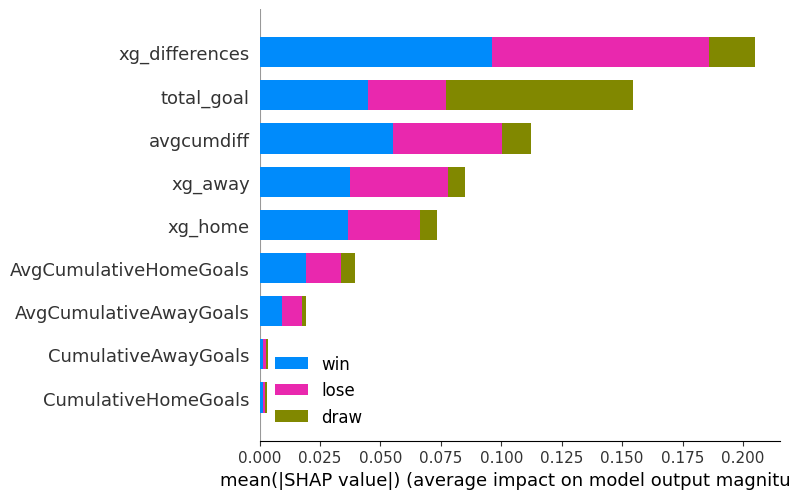

In [ ]:
#Plotting SHAP graph

shap.summary_plot(list(shap_values), X_test, class_names=class_name, max_display=10)

# Skope Rules Algorithm


In [ ]:
#skope rules implementation

from skrules import SkopeRules
from sklearn.metrics import precision_recall_curve

X = datum
y = target


clf = SkopeRules(max_depth=4,
                 n_estimators=72,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names= X.columns)

X_trains = []
X_tests = []
y_trains = []
y_tests = []

for train_index, test_index in StratifiedKFold(n_splits=5).split(X,y):
  X_train, X_test =  X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y[train_index], y[test_index]
  X_trains.append(X_train)
  X_tests.append(X_test)
  y_trains.append(y_train)
  y_tests.append(y_test)

predicted_targets = np.array([])
actual_targets = np.array([])

for i in range(len(X_trains)):
  f1_scores = []
  for idx, styles in enumerate(class_name):
      X, y = X_trains[i], y_trains[i]
      clf.fit(X, y == idx)
      rules = clf.rules_[0:1]
      print(styles + ' ' + str(i))
      precisions = []
      recalls = []
      for rule in rules:
          print(rule)
          rule1, a = rule
          precision, recall, tree = a
          precisions.append(precision)
          recalls.append(recall)
      avg_precision = sum(precisions)/ len(precisions)
      avg_recall = sum(recalls)/ len(recalls)
      avg_f1_score = 2* (avg_precision * avg_recall) / (avg_precision + avg_recall)
      f1_scores.append(avg_f1_score)
      print('avg precision of ' + styles +" = {}".format(avg_precision))
      print('avg recall of ' + styles + ' = {}'.format(avg_recall))
      print('avg f1 score of ' + styles + ' = {}'.format(avg_f1_score))
      print()
      print(20*'=')
      print()
  avg_f1_scores = sum(f1_scores)/len(f1_scores)
  print('avg f1 score of fold {} = {}'.format(i, avg_f1_scores))
  print(20*'=')





`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


win 0
('total_goal > 0.2500000074505806 and xg_differences > 0.34885330498218536 and avgcumdiff > -0.343137264251709', (0.7724358974358975, 0.35756676557863504, 1))
avg precision of win = 0.7724358974358975
avg recall of win = 0.35756676557863504
avg f1 score of win = 0.4888438133874239




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


lose 0
('total_goal > 0.05000000074505806 and xg_differences <= -0.33834226429462433 and xg_differences > -1.5409345030784607 and avgcumdiff <= 0.1715686321258545', (0.6527674172971162, 0.3619523321258112, 5))
avg precision of lose = 0.6527674172971162
avg recall of lose = 0.3619523321258112
avg f1 score of lose = 0.46568658816545405




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


draw 0
('total_goal <= 0.2500000074505806 and total_goal > 0.15000000223517418 and avgcumdiff <= 1.7073863744735718', (0.5382436260623229, 0.475, 1))
avg precision of draw = 0.5382436260623229
avg recall of draw = 0.475
avg f1 score of draw = 0.5046480743691899


avg f1 score of fold 0 = 0.48639282530735595


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


win 1
('total_goal > 0.2500000074505806 and xg_differences > 0.4347527474164963 and avgcumdiff > -0.343137264251709', (0.8268551236749117, 0.3416058394160584, 1))
avg precision of win = 0.8268551236749117
avg recall of win = 0.3416058394160584
avg f1 score of win = 0.48347107438016523




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


lose 1
('total_goal > 0.05000000074505806 and xg_differences <= -0.33834226429462433 and xg_differences > -1.4550350308418274 and avgcumdiff <= 0.12916667014360428', (0.6231884057971014, 0.33659491193737767, 1))
avg precision of lose = 0.6231884057971014
avg recall of lose = 0.33659491193737767
avg f1 score of lose = 0.43710292249047017




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


draw 1
('total_goal <= 0.2500000074505806 and total_goal > 0.15000000223517418 and CumulativeAwayGoals > 0.010869565419852734', (0.5037507740809548, 0.49580514023791333, 2))
avg precision of draw = 0.5037507740809548
avg recall of draw = 0.49580514023791333
avg f1 score of draw = 0.4997463765863699


avg f1 score of fold 1 = 0.47344012448566847


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


win 2
('total_goal > 0.05000000074505806 and xg_differences <= 1.5514455437660217 and xg_differences > 0.34885330498218536 and avgcumdiff > -0.3550420254468918', (0.7449494949494949, 0.4416167664670659, 1))
avg precision of win = 0.7449494949494949
avg recall of win = 0.4416167664670659
avg f1 score of win = 0.5545112781954887




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


lose 2
('total_goal > 0.05000000074505806 and xg_differences <= -0.33834226429462433 and xg_differences > -1.197336733341217 and avgcumdiff <= 0.12916667014360428', (0.6245059288537549, 0.3278008298755187, 1))
avg precision of lose = 0.6245059288537549
avg recall of lose = 0.3278008298755187
avg f1 score of lose = 0.42993197278911566




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


draw 2
('total_goal <= 0.2500000074505806 and total_goal > 0.15000000223517418 and xg_differences <= 0.864249974489212', (0.5403665208063109, 0.4500603267323837, 7))
avg precision of draw = 0.5403665208063109
avg recall of draw = 0.4500603267323837
avg f1 score of draw = 0.4910964065921654


avg f1 score of fold 2 = 0.49184655252558995


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


win 3
('total_goal > 0.05000000074505806 and xg_differences > 0.5206521898508072 and avgcumdiff > 0.5590277910232544', (0.8237179487179487, 0.3660968660968661, 1))
avg precision of win = 0.8237179487179487
avg recall of win = 0.3660968660968661
avg f1 score of win = 0.5069033530571991




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


lose 3
('total_goal > 0.2500000074505806 and xg_differences <= -0.33834226429462433 and avgcumdiff <= 0.09545454755425453', (0.7619047619047619, 0.29508196721311475, 1))
avg precision of lose = 0.7619047619047619
avg recall of lose = 0.29508196721311475
avg f1 score of lose = 0.4254062038404727




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


draw 3
('total_goal <= 0.2500000074505806 and total_goal > 0.15000000223517418 and CumulativeAwayGoals > 0.010869565419852734', (0.5240793201133145, 0.48429319371727747, 1))
avg precision of draw = 0.5240793201133145
avg recall of draw = 0.48429319371727747
avg f1 score of draw = 0.5034013605442178


avg f1 score of fold 3 = 0.4785703058139632


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


win 4
('total_goal > 0.2500000074505806 and xg_differences > 0.34885330498218536 and avgcumdiff > -0.343137264251709', (0.8292682926829268, 0.3606060606060606, 1))
avg precision of win = 0.8292682926829268
avg recall of win = 0.3606060606060606
avg f1 score of win = 0.5026399155227032




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


lose 4
('total_goal > 0.05000000074505806 and xg_differences <= -0.33834226429462433 and xg_differences > -1.369135558605194 and avgcumdiff <= 0.1715686321258545', (0.5960270886758803, 0.3042282590031951, 5))
avg precision of lose = 0.5960270886758803
avg recall of lose = 0.3042282590031951
avg f1 score of lose = 0.4028374482286248




`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


draw 4
('total_goal <= 0.2500000074505806 and total_goal > 0.15000000223517418 and xg_differences <= 0.950149416923523', (0.5457227138643068, 0.43427230046948356, 1))
avg precision of draw = 0.5457227138643068
avg recall of draw = 0.43427230046948356
avg f1 score of draw = 0.4836601307189543


avg f1 score of fold 4 = 0.4630458314900941


# XGBoost

[0.810997442455243, 0.8034526854219949, 0.8047314578005115, 0.8074168797953964, 0.8048593350383632]
[0.6997442455242967, 0.7294117647058823, 0.7202046035805627, 0.7017902813299233, 0.7283887468030691]
training accuracy = 0.8062915601023019
test accuracy = 0.7159079283887467
              precision    recall  f1-score   support

         win       0.75      0.76      0.75      4268
        lose       0.71      0.62      0.66      3057
        draw       0.67      0.77      0.72      2450

    accuracy                           0.72      9775
   macro avg       0.71      0.71      0.71      9775
weighted avg       0.72      0.72      0.71      9775



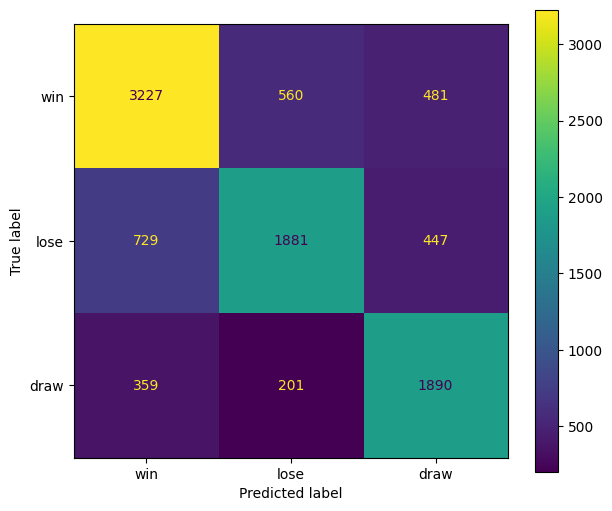

In [ ]:
import xgboost
#xgboost

X = datum
y = target
graphs = []
model = xgboost.XGBClassifier(seed=82, max_depth=4)

accuracy_trainings = []
accuracy_tests = []

predicted_targets = np.array([])
actual_targets = np.array([])

#Training data with Stratified 5-fold Cross Validation

for train_index, test_index in StratifiedKFold().split(X,y):

  # separating training and test set
  X_train, X_test =  X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y[train_index], y[test_index]

  #training and predict model
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  report = classification_report(y_test, model.predict(X_test), target_names = class_name)

  accuracy_trainings.append(accuracy_score(y_train, model.predict(X_train)))
  accuracy_tests.append(accuracy_score(y_test, predictions))

  #Visualize Decision Tree Model of each 5-fold
  img = xgboost.to_graphviz(model)
  graphs.append(img)
  '''
  cm_1 = confusion_matrix(y_test, predictions)
  rp = classification_report(y_test, predictions, target_names = class_name)
  '''
  predicted_targets = np.append(predicted_targets, predictions)
  actual_targets = np.append(actual_targets, y_test)
  '''
  print(rp)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels= class_name)
  fig, ax = plt.subplots(figsize=(7,6))
  disp.plot(ax=ax)
  '''


# Plot decision tree with the best accuracy
dicts = {accuracy_tests[i]: graphs[i] for i in range(len(accuracy_tests))}
sorted_dicts = OrderedDict(sorted(dicts.items()))

list(sorted_dicts.values())[-1].render('xgboost 3 class.png', view=True)


#Confusion Matrix and Classification Report (Precise, Recall, f1-score)
cm = confusion_matrix(actual_targets, predicted_targets)
report = classification_report(actual_targets, predicted_targets, target_names =class_name)

# Visualizing all result
print(accuracy_trainings)
print(accuracy_tests)
print('training accuracy = {}'.format(np.average(accuracy_trainings)))
print('test accuracy = {}'.format(np.average(accuracy_tests)))

print(report)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= class_name)
fig, ax = plt.subplots(figsize=(7,6))
disp.plot(ax=ax)


